# ロジスティック回帰モデルの練習

## ２値分類例

ピマ・インディアンの糖尿病になる・ならないの２値クラス分類モデルの練習

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [118]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [121]:
X  = df[[col for col in df.columns if col != 'Outcome']]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019, test_size=0.2, stratify=y)

logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train, y_train)

pred = logreg.predict_proba(X_test)[:,1]
pred

array([0.60669742, 0.6531626 , 0.50240449, 0.98053494, 0.00676022,
       0.18879148, 0.18082954, 0.14307565, 0.78281108, 0.09794202,
       0.149936  , 0.28758052, 0.28377477, 0.37972104, 0.0973115 ,
       0.82041535, 0.36225642, 0.03611739, 0.47680153, 0.65551133,
       0.02440018, 0.29001266, 0.07023208, 0.46693861, 0.57432225,
       0.08106936, 0.74727661, 0.40611406, 0.63078292, 0.62174987,
       0.38924812, 0.48296923, 0.51965599, 0.3266164 , 0.06885975,
       0.12069052, 0.18278442, 0.76160476, 0.11738907, 0.13796618,
       0.66733406, 0.26699552, 0.40761432, 0.43213549, 0.22497004,
       0.34834204, 0.27437436, 0.16241021, 0.85365412, 0.12342848,
       0.04355689, 0.27797811, 0.96141651, 0.39344536, 0.23077607,
       0.108312  , 0.29639094, 0.87794967, 0.59712703, 0.02776057,
       0.31021744, 0.10037754, 0.73522814, 0.11629694, 0.38400258,
       0.09190641, 0.61806754, 0.79871362, 0.30137599, 0.28306039,
       0.82813958, 0.15004443, 0.57173583, 0.12872038, 0.02800

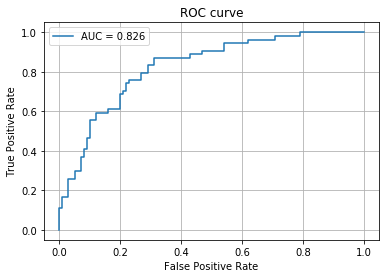

In [122]:
fpr, tpr, threholds = roc_curve(y_test, pred)
auc_score = roc_auc_score(y_test, pred)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [123]:
pred_class = logreg.predict(X_test)

In [124]:
pred_class

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [125]:
# 混同行列を作成
classes = [1, 0]
cm = confusion_matrix(y_test, pred_class, labels=classes)
cm

array([[32, 22],
       [13, 87]])

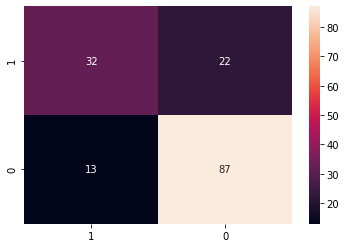

In [126]:
# 混同行列をプロット
cmdf = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(cmdf, annot=True)

## スケーリング処理

In [127]:
# dfをfeaturesとtargetに分割
X = df[[col for col in df.columns if col not in ['Outcome']]] # リスト内包表記：[iの処理 for i in 配列など if文]
y = df.Outcome

In [128]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [129]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [130]:
# 標準化
X = StandardScaler().fit_transform(X) # インスタンス化とメソッド適用を同時に

In [131]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019, test_size=0.20, stratify=y)

In [132]:
# 学習
logreg = LogisticRegression(max_iter=150) # defaultの１００では収束しない
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
# 予測クラスのorder確認 
logreg.classes_

array([0, 1])

In [134]:
# 特徴量X_testでpredictして、クラス１の確率を抽出
pred = logreg.predict_proba(X_test)[:,1]
pred

array([0.59749981, 0.64568747, 0.49472603, 0.97899838, 0.00729058,
       0.18672281, 0.17924459, 0.14520066, 0.77779824, 0.10190019,
       0.14901956, 0.28303359, 0.28629204, 0.38338128, 0.10508333,
       0.81603977, 0.35976555, 0.03661408, 0.46865576, 0.6446301 ,
       0.02539191, 0.28509502, 0.07324961, 0.46115002, 0.5685505 ,
       0.08204192, 0.73817321, 0.41795597, 0.63094348, 0.61877367,
       0.38586394, 0.48653886, 0.51346509, 0.32523505, 0.06839298,
       0.12087258, 0.17921626, 0.75040787, 0.11630437, 0.13410453,
       0.65490994, 0.27343023, 0.40354164, 0.43149361, 0.222436  ,
       0.34929567, 0.26908395, 0.17065164, 0.85592016, 0.12453775,
       0.04427455, 0.27267568, 0.96125922, 0.38955414, 0.23622991,
       0.10771398, 0.2946123 , 0.87273161, 0.61394967, 0.02848408,
       0.31564919, 0.10113674, 0.72944958, 0.11441802, 0.37930092,
       0.09206153, 0.62929204, 0.7953971 , 0.29598795, 0.27998904,
       0.82585036, 0.1483405 , 0.57474493, 0.12872345, 0.02949

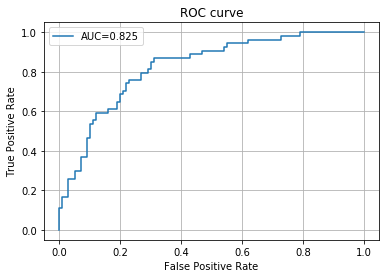

In [135]:
# ROC曲線プロット
fpr, tpr, threholds = roc_curve(y_test, pred)
auc_score = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label='AUC=%.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 特徴量選択

In [136]:
from sklearn.feature_selection import RFE

In [137]:
logreg = LogisticRegression()
rfe = RFE(logreg, 5) # RFE(model, n)でmodelの特徴量をn個にする
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [138]:
# 選ばれた特徴量を確認
rfe.support_

array([ True,  True,  True, False, False,  True,  True, False])

In [139]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [140]:
#　選ばれた特徴量でモデルを再構築
X = df[[col for col in df.columns if col not in ['SkinThickness', 'Insulin', 'Age', 'Outcome'] ]]
y = df.Outcome

# 標準化
X = StandardScaler().fit_transform(X)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019,test_size=0.20, stratify=y)

# モデルの学習
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 予測1の列を抽出
pred = logreg.predict_proba(X_test)[:, 1]
pred[:10,]

array([0.5314903 , 0.56862173, 0.48412926, 0.97476319, 0.00890535,
       0.19366685, 0.19548739, 0.13623674, 0.78119523, 0.11762531])

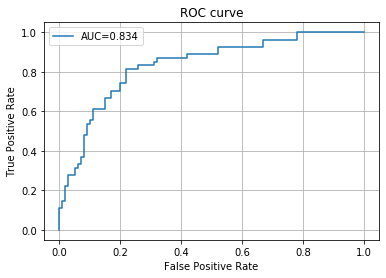

In [141]:
# ROC曲線プロット
fpr, tpr, threholds = roc_curve(y_test, pred)
auc_score = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label='AUC=%.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## カテゴリ変数の処理

In [142]:
pref = pd.DataFrame({'都道府県':['青森', '青森', '宮崎', '秋田', '北海道', '秋田', '北海道']})
pref

,都道府県
0,青森
1,青森
2,宮崎
3,秋田
4,北海道
5,秋田
6,北海道


In [143]:
# 数値データに置き換え
# pandasのfactorizeを使うとラベルエンコーディングができる
pref['pref_int'] = pd.factorize(pref['都道府県'])[0]
pref

,都道府県,pref_int
0,青森,0
1,青森,0
2,宮崎,1
3,秋田,2
4,北海道,3
5,秋田,2
6,北海道,3


In [144]:
# one-hotエンコーディング
pref = pd.get_dummies(pref, columns=['都道府県'])
pref

,pref_int,都道府県_北海道,都道府県_宮崎,都道府県_秋田,都道府県_青森
0,0,0,0,0,1
1,0,0,0,0,1
2,1,0,1,0,0
3,2,0,0,1,0
4,3,1,0,0,0
5,2,0,0,1,0
6,3,1,0,0,0
